In [10]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
gpd.read_file?

In [12]:
# Read shapefile
ph = gpd.read_file('gadm36_PHL_1.shp')
ph.head(55)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [13]:
type(ph)

geopandas.geodataframe.GeoDataFrame

(116.444486621, 127.08919715899998, 3.7627797585000007, 21.894300891500002)

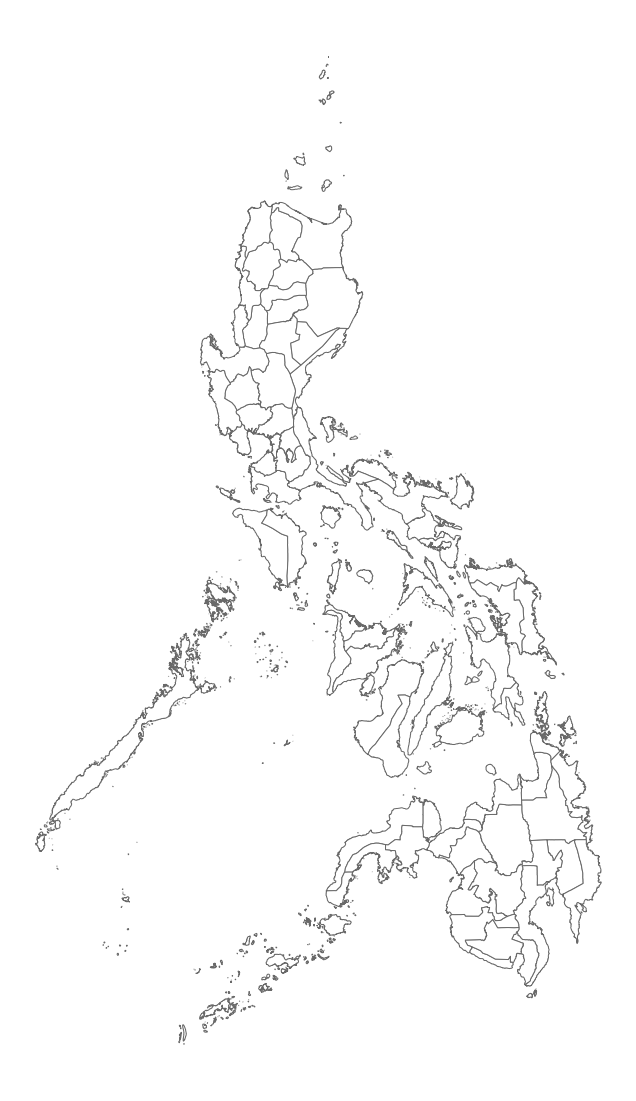

In [14]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

In [15]:
# Read GeoJSON file
healthsites = gpd.read_file('philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


In [16]:
print(healthsites.crs)
print(ph.crs)

epsg:4326
epsg:4326


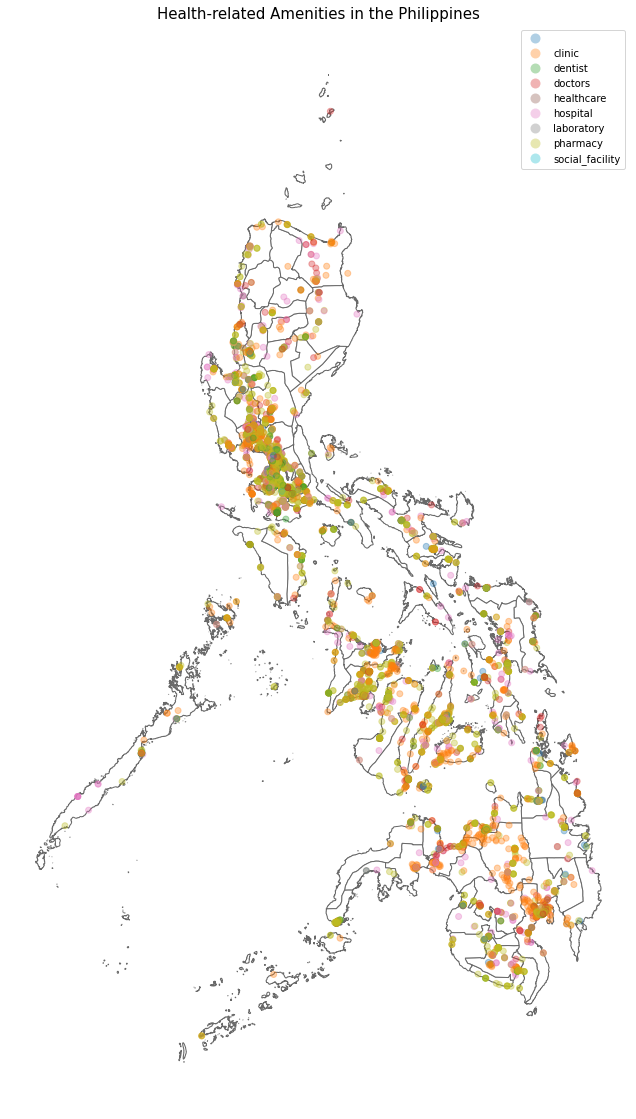

In [17]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [18]:
healthsites.describe(include=np.object)

,osm_type,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,insurance,staff_doctors,contact_number,...,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag
count,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,...,10405,10365,10405,10405,10405,10405,10405,10405,1,1
unique,2,1,9,98,1668,873,5,2,2,332,...,2,1667,4,7,2,26,53,16,1,1
top,node,,pharmacy,,,,,,,,...,,GOwin,,,,,,,0,"drugs, prescription, medical supplies, first-aid"
freq,7481,10405,4078,10043,7014,9311,9868,10404,10404,10069,...,10404,1904,10327,10399,10404,9647,6405,9330,1,1


In [19]:
healthsites.osm_type.unique

<bound method Series.unique of 0        node
1        node
2         way
3        node
4         way
         ... 
10400     way
10401    node
10402     way
10403    node
10404    node
Name: osm_type, Length: 10405, dtype: object>

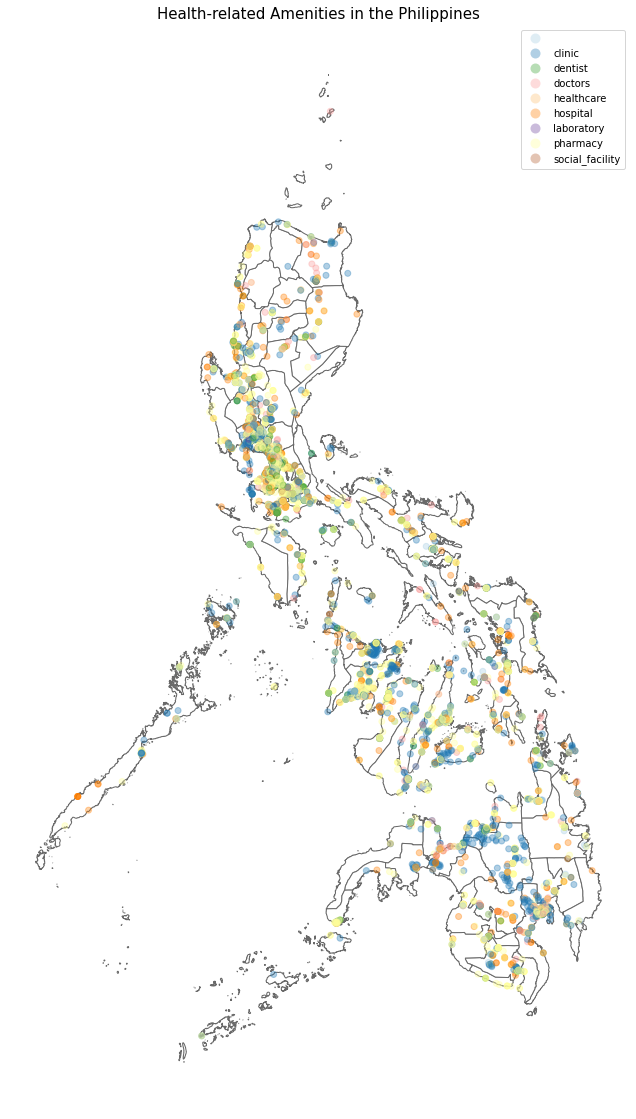

In [20]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

# Rizal

In [21]:
mm = ph[ph.NAME_1=="Rizal"]

healthwithin = gpd.sjoin(healthsites,mm, op='within')
healthwithin.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
73,263209152,way,18.0,,pharmacy,,Quezon Avenue,,,92976425.0,...,PHL,Philippines,PHL.64_1,Rizal,None,None,Lalawigan|Probinsya,Province,458,PH.RI
97,183018529,way,12.0,,hospital,,,,,18314197.0,...,PHL,Philippines,PHL.64_1,Rizal,None,None,Lalawigan|Probinsya,Province,458,PH.RI
126,696288975,node,18.0,,dentist,,,,,57129374.0,...,PHL,Philippines,PHL.64_1,Rizal,None,None,Lalawigan|Probinsya,Province,458,PH.RI
191,1994958461,node,18.0,,pharmacy,,,,,87227325.0,...,PHL,Philippines,PHL.64_1,Rizal,None,None,Lalawigan|Probinsya,Province,458,PH.RI
241,7722799685,node,9.0,,pharmacy,,,,,88114233.0,...,PHL,Philippines,PHL.64_1,Rizal,None,None,Lalawigan|Probinsya,Province,458,PH.RI


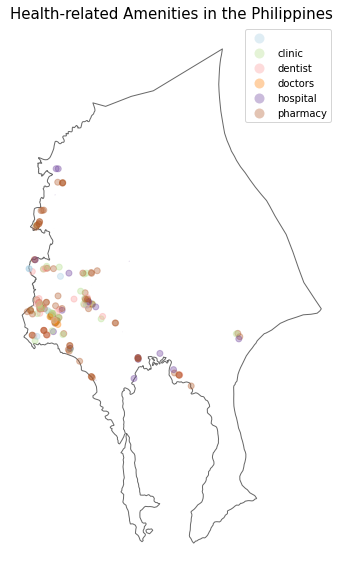

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

mm.plot(ax=ax, color='white', edgecolor='dimgray')
healthwithin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

# province has no healthcare, laboratory and social facility

In [23]:
riz = ph[ph.NAME_1=="Rizal"]
clinic = healthsites[healthsites.amenity=='clinic']
clinicwithin = gpd.sjoin(clinic,riz, op='within')
clinicwithin.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
362,568501467,way,21.0,,clinic,,A. Bonifacio Avenue,,,66085850.0,...,PHL,Philippines,PHL.64_1,Rizal,None,None,Lalawigan|Probinsya,Province,458,PH.RI
437,585836138,way,9.0,,clinic,,,,,58698445.0,...,PHL,Philippines,PHL.64_1,Rizal,None,None,Lalawigan|Probinsya,Province,458,PH.RI
618,871986054,way,15.0,,clinic,,Saint Luke,,,94414948.0,...,PHL,Philippines,PHL.64_1,Rizal,None,None,Lalawigan|Probinsya,Province,458,PH.RI
659,4573090452,node,9.0,,clinic,,,,,44681052.0,...,PHL,Philippines,PHL.64_1,Rizal,None,None,Lalawigan|Probinsya,Province,458,PH.RI
662,2387345169,node,18.0,,clinic,,St. John the Baptist Street,,,96228716.0,...,PHL,Philippines,PHL.64_1,Rizal,None,None,Lalawigan|Probinsya,Province,458,PH.RI


In [24]:
riz = ph[ph.NAME_1=="Rizal"]
social = healthsites[healthsites.amenity=='social_facility']
socwithin = gpd.sjoin(social,riz, op='within')

In [25]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

riz.plot(ax=ax, color='white', edgecolor='dimgray')
socwithin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('social facilities in Rizal', fontsize=15)
ax.axis('off');

C:\Users\Antonio\miniconda3\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
posx and posy should be finite values


AttributeError: 'NoneType' object has no attribute 'extents'

<Figure size 720x720 with 1 Axes>

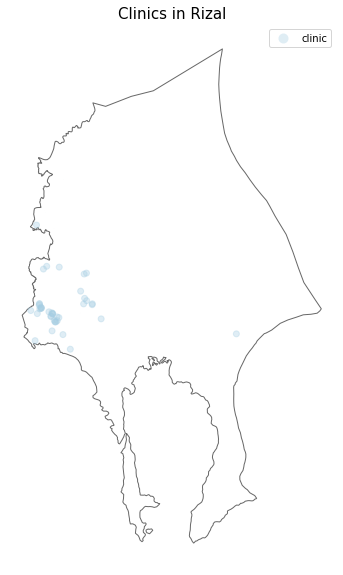

In [26]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

riz.plot(ax=ax, color='white', edgecolor='dimgray')
clinicwithin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Clinics in Rizal', fontsize=15)
ax.axis('off');

In [27]:
dentist = healthsites[healthsites.amenity=='dentist']
dentistwithin = gpd.sjoin(dentist,riz, op='within')

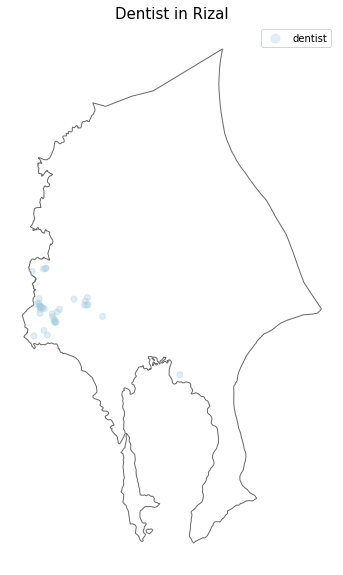

In [28]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

riz.plot(ax=ax, color='white', edgecolor='dimgray')
dentistwithin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Dentist in Rizal', fontsize=15)
ax.axis('off');

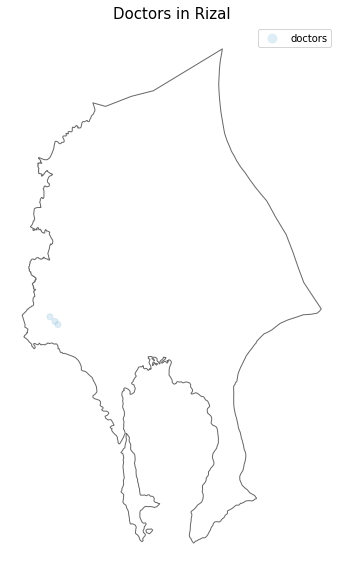

In [29]:
doctors = healthsites[healthsites.amenity=='doctors']
doctorswithin = gpd.sjoin(doctors,riz, op='within')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

riz.plot(ax=ax, color='white', edgecolor='dimgray')
doctorswithin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Doctors in Rizal', fontsize=15)
ax.axis('off');

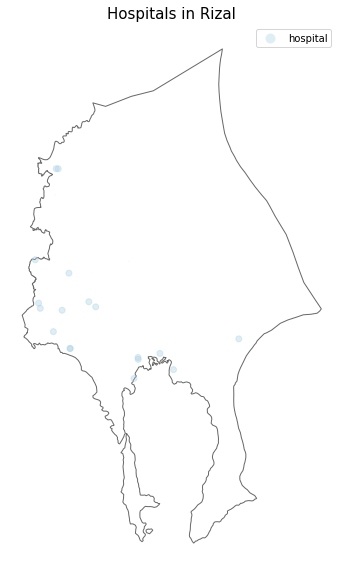

In [30]:
hospitals = healthsites[healthsites.amenity=='hospital']
hospitalswithin = gpd.sjoin(hospitals,riz, op='within')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

riz.plot(ax=ax, color='white', edgecolor='dimgray')
hospitalswithin.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Hospitals in Rizal', fontsize=15)
ax.axis('off');

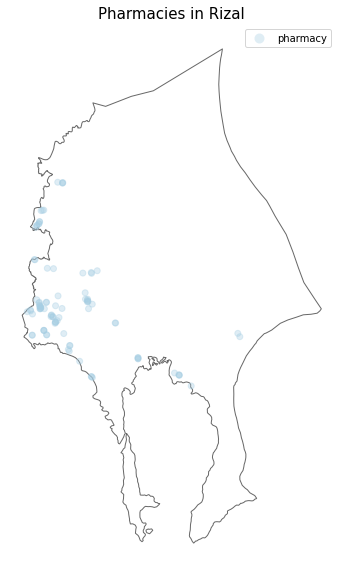

In [31]:
pharmacy = healthsites[healthsites.amenity=='pharmacy']
pharmacywithin = gpd.sjoin(pharmacy,riz, op='within')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

riz.plot(ax=ax, color='white', edgecolor='dimgray')
pharmacywithin.plot(ax=ax, column="amenity",cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Rizal', fontsize=15)
ax.axis('off');

In [32]:
bohol = ph[ph.NAME_1=="Bohol"]

healthwithinboh = gpd.sjoin(healthsites,bohol, op='within')
healthwithinboh.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
5,678983870,node,9.0,,clinic,,,,,4282186.0,...,PHL,Philippines,PHL.15_1,Bohol,None,None,Lalawigan|Probinsya,Province,712,PH.BO
62,671511017,way,9.0,,hospital,,,,,67345002.0,...,PHL,Philippines,PHL.15_1,Bohol,None,None,Lalawigan|Probinsya,Province,712,PH.BO
131,242558918,way,12.0,,hospital,,,,,27499739.0,...,PHL,Philippines,PHL.15_1,Bohol,None,None,Lalawigan|Probinsya,Province,712,PH.BO
153,708165745,way,18.0,,hospital,,Tagbilaran East Road,,,76431315.0,...,PHL,Philippines,PHL.15_1,Bohol,None,None,Lalawigan|Probinsya,Province,712,PH.BO
205,678983894,node,9.0,,clinic,,,,,4282186.0,...,PHL,Philippines,PHL.15_1,Bohol,None,None,Lalawigan|Probinsya,Province,712,PH.BO


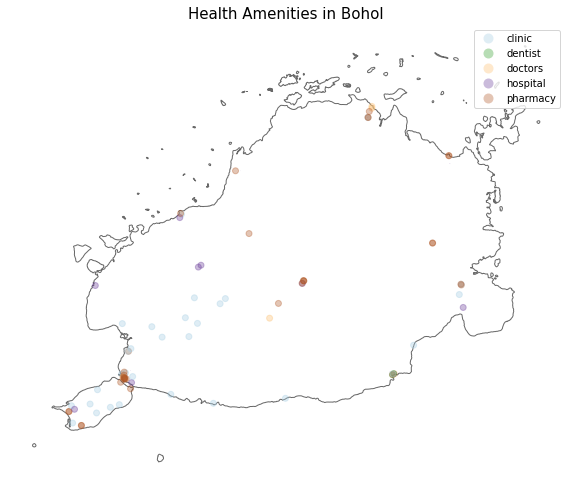

In [33]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

bohol.plot(ax=ax, color='white', edgecolor='dimgray')
healthwithinboh.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health Amenities in Bohol', fontsize=15)
ax.axis('off');
# province has no healthcare, laboratory and social facility

In [34]:
bohol = ph[ph.NAME_1=="Bohol"]
clinic = healthsites[healthsites.amenity=='clinic']
clinicwithinboh = gpd.sjoin(clinic,bohol, op='within')
clinicwithinboh.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
5,678983870,node,9.0,,clinic,,,,,4282186.0,...,PHL,Philippines,PHL.15_1,Bohol,None,None,Lalawigan|Probinsya,Province,712,PH.BO
205,678983894,node,9.0,,clinic,,,,,4282186.0,...,PHL,Philippines,PHL.15_1,Bohol,None,None,Lalawigan|Probinsya,Province,712,PH.BO
216,317476520,way,9.0,,clinic,,,,,27499891.0,...,PHL,Philippines,PHL.15_1,Bohol,None,None,Lalawigan|Probinsya,Province,712,PH.BO
285,242438981,way,12.0,,clinic,,,,,27499752.0,...,PHL,Philippines,PHL.15_1,Bohol,None,None,Lalawigan|Probinsya,Province,712,PH.BO
311,242497737,way,9.0,,clinic,,,,,27499960.0,...,PHL,Philippines,PHL.15_1,Bohol,None,None,Lalawigan|Probinsya,Province,712,PH.BO


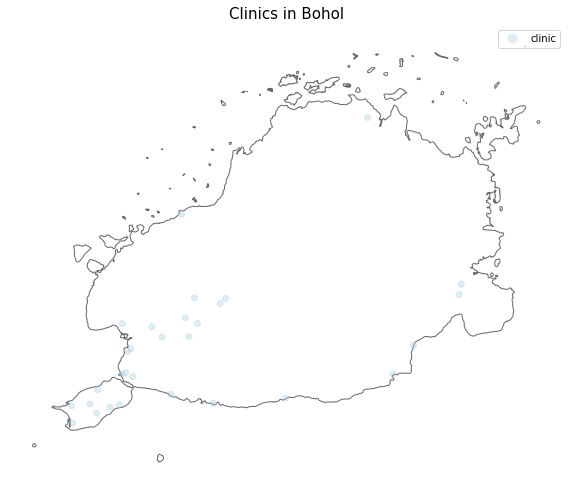

In [35]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

bohol.plot(ax=ax, color='white', edgecolor='dimgray')
clinicwithinboh.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Clinics in Bohol', fontsize=15)
ax.axis('off');

In [36]:
dentistboh = healthsites[healthsites.amenity=='dentist']
dentistwithinboh = gpd.sjoin(dentistboh,bohol, op='within')

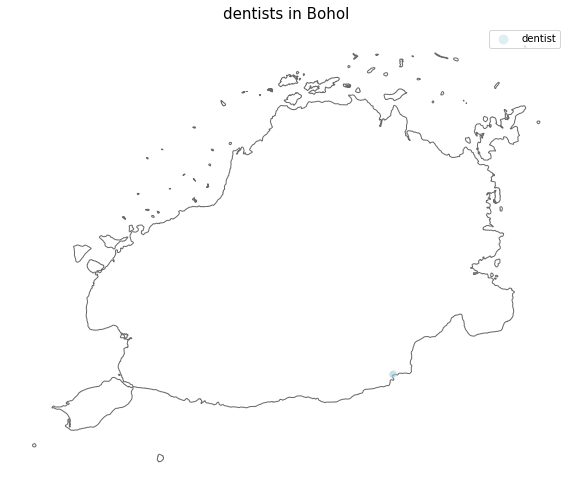

In [37]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

bohol.plot(ax=ax, color='white', edgecolor='dimgray')
dentistwithinboh.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('dentists in Bohol', fontsize=15)
ax.axis('off');

In [38]:
doctorboh = healthsites[healthsites.amenity=='doctors']
doctorwithinboh = gpd.sjoin(doctorboh,bohol, op='within')

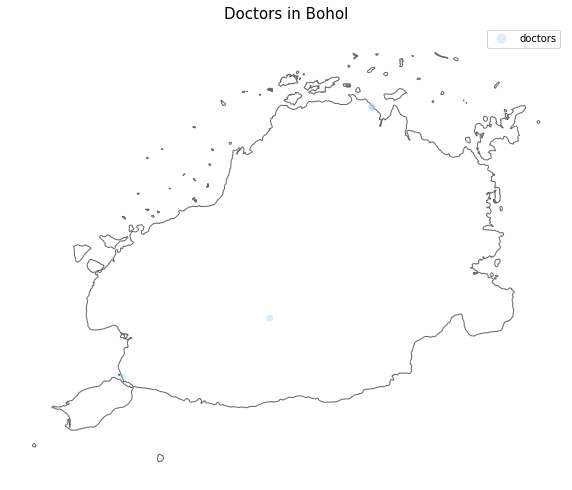

In [39]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

bohol.plot(ax=ax, color='white', edgecolor='dimgray')
doctorwithinboh.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Doctors in Bohol', fontsize=15)
ax.axis('off');

In [40]:
hospitalboh = healthsites[healthsites.amenity=='hospital']
hospitalwithinboh = gpd.sjoin(hospitalboh,bohol, op='within')

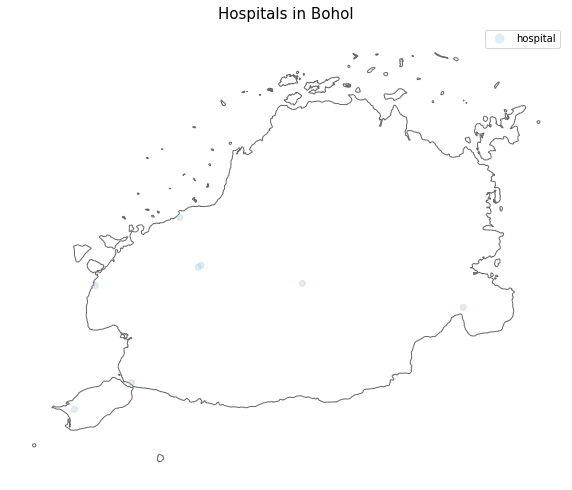

In [41]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

bohol.plot(ax=ax, color='white', edgecolor='dimgray')
hospitalwithinboh.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Hospitals in Bohol', fontsize=15)
ax.axis('off');

In [42]:
pharmacyboh = healthsites[healthsites.amenity=='pharmacy']
pharmacywithinboh = gpd.sjoin(pharmacyboh,bohol, op='within')

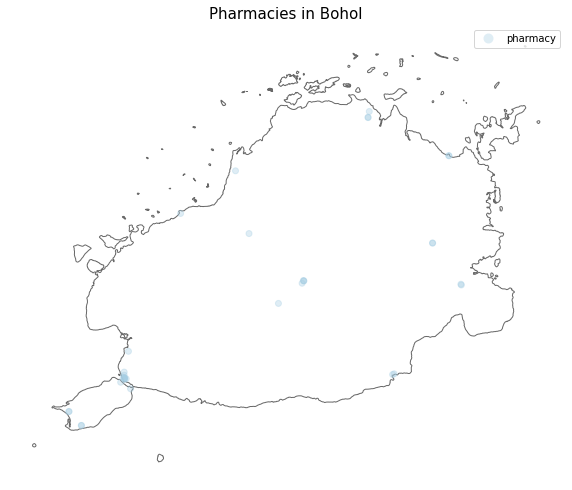

In [43]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

bohol.plot(ax=ax, color='white', edgecolor='dimgray')
pharmacywithinboh.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Bohol', fontsize=15)
ax.axis('off');